In [51]:
import json
import random
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [52]:
# Load the dataset
with open('SRU_DATASET.json', 'r') as file:
    intents = json.load(file)


In [54]:
# Prepare training data
training_sentences = []
training_labels = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])

# Vectorize sentences
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lemmatize, stop_words='english')
X = vectorizer.fit_transform(training_sentences)
y = training_labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "Naive Bayes": MultinomialNB(),
}

# Dictionary to store evaluation metrics
results = {}

# Train and evaluate each model
# Train and evaluate models with balanced class weights
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Add class_weight='balanced' for models that support it
    if model_name in ["Logistic Regression", "SVM", "Random Forest"]:
        model.set_params(class_weight='balanced')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": confusion
    }
    print(f"{model_name} Accuracy: {accuracy:.2f}")



Training Logistic Regression...
Logistic Regression Accuracy: 0.87
Training SVM...
SVM Accuracy: 0.82
Training Naive Bayes...
Naive Bayes Accuracy: 0.54


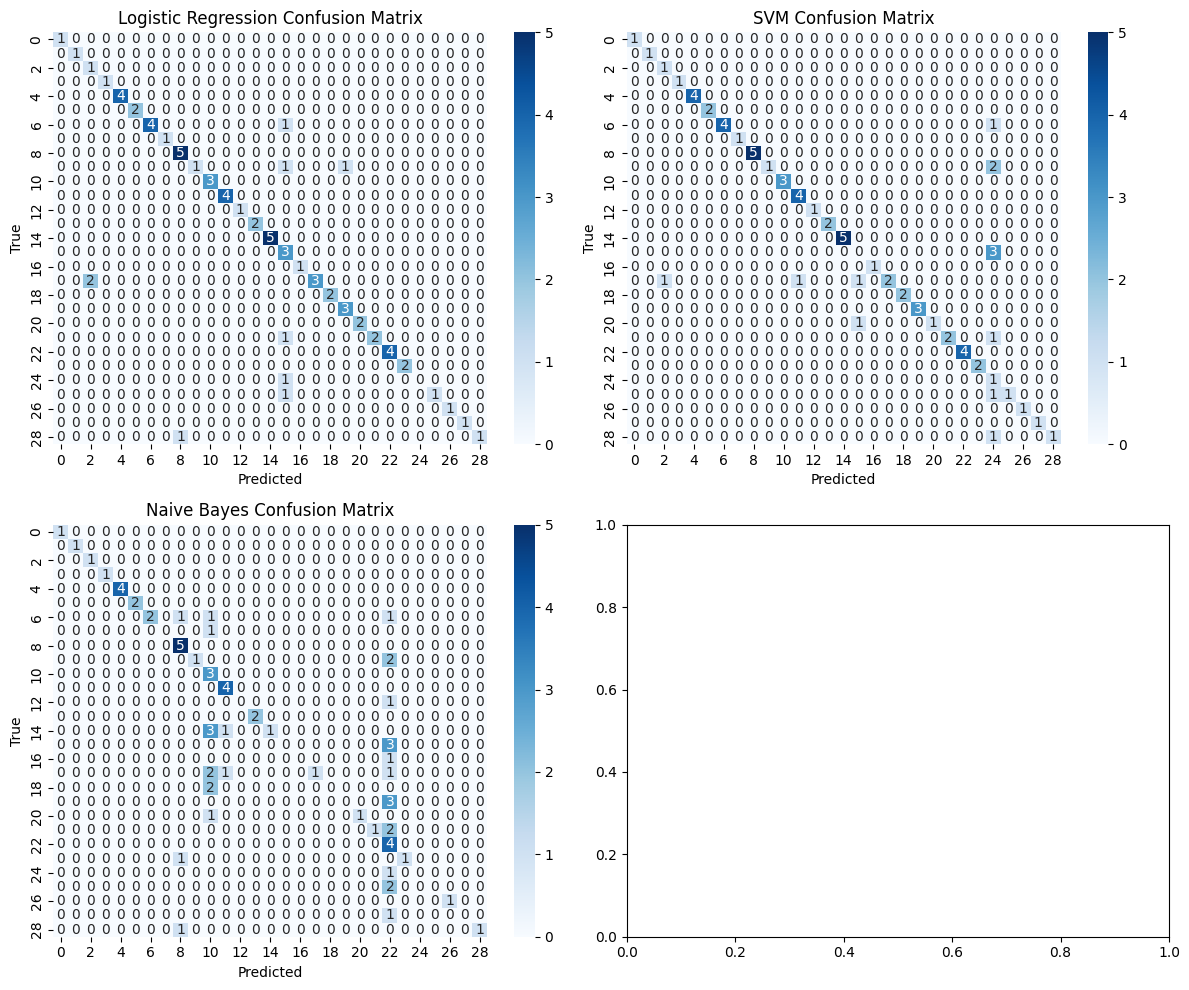

<ipython-input-56-4100796b1ebf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")


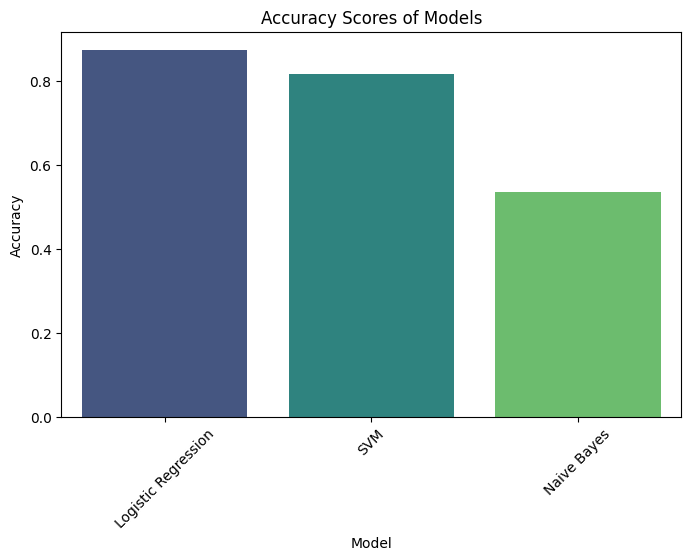

In [56]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (model_name, metrics) in enumerate(results.items()):
    cm = metrics["confusion_matrix"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{model_name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

plt.tight_layout()
plt.show()

# Plot accuracy scores
accuracy_scores = [metrics["accuracy"] for metrics in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="viridis")
plt.title("Accuracy Scores of Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()


In [57]:
# Print detailed classification report
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, model.predict(X_test)))



Model: Logistic Regression
Accuracy: 0.87
Classification Report:
                precision    recall  f1-score   support

     admission       1.00      1.00      1.00         1
       canteen       1.00      1.00      1.00         1
college intake       1.00      1.00      1.00         1
        course       1.00      1.00      1.00         1
       creator       1.00      1.00      1.00         4
      document       1.00      1.00      1.00         2
         event       1.00      0.40      0.57         5
    facilities       0.00      0.00      0.00         1
          fees       0.62      1.00      0.77         5
      greeting       1.00      0.33      0.50         3
        hostel       0.23      1.00      0.38         3
         hours       0.67      1.00      0.80         4
infrastructure       0.00      0.00      0.00         1
       library       1.00      1.00      1.00         2
      location       1.00      0.20      0.33         5
          name       0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

                precision    recall  f1-score   support

     admission       1.00      1.00      1.00         1
       canteen       1.00      1.00      1.00         1
college intake       1.00      1.00      1.00         1
        course       1.00      1.00      1.00         1
       creator       1.00      1.00      1.00         4
      document       1.00      1.00      1.00         2
         event       1.00      0.40      0.57         5
    facilities       0.00      0.00      0.00         1
          fees       0.62      1.00      0.77         5
      greeting       1.00      0.33      0.50         3
        hostel       0.23      1.00      0.38         3
         hours       0.67      1.00      0.80         4
infrastructure       0.00      0.00      0.00         1
       library       1.00      1.00      1.00         2
      location       1.00      0.20      0.33         5
          name       0.00      0.00      0.00         3
          nirf       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_lemmatize)
X_train = vectorizer.fit_transform(training_sentences)
print("Shape of training data:", X_train.shape)


Shape of training data: (352, 251)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [59]:
# Consider exploring alternative ML models for intent classification
# For example, from sklearn: SVC (Support Vector Classification)
# Or consider libraries like spaCy for advanced NLP tasks
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, training_labels)
# Conversation state management (optional)
context = {}  # Dictionary to store conversation history

In [60]:
def get_response(tag, intents_json, context=None):
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            if context and 'context_set' in i:
                # Check for context-specific responses
                if context.get(i['context_set'], False):
                    return random.choice(i['responses']['context_aware'])
            return random.choice(i['responses'])

In [61]:
def chatbot_response(text):
    global context  # Access and update conversational context

    text_vectorized = vectorizer.transform([text])
    predicted_intent = classifier.predict(text_vectorized)[0]

    # Update context based on the predicted intent (optional)
    if predicted_intent in [intent['tag'] for intent in intents['intents'] if 'context_set' in intent]:
        context[predicted_intent] = True  # Flag for context-aware responses

    response = get_response(predicted_intent, intents, context)  # Pass context if applicable
    return response

In [67]:
# Chatbot initialization with reflection (optional)
pairs = [
    ('(.*)', 'Do you want to talk about %1?'),
]
chatbot = Chat(pairs,reflections)

print("Bot: Hello! I am the ChatBot. How can I assist you today? (type 'exit' to end the conversation)")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Botu: Goodbye! Have a great day.")
        break

    # Utilize the Chat library if integrated (optional)
    # response = chatbot.respond(user_input)
    # print("Bot:", response)

    response = chatbot_response(user_input)
    print("Botu:", response)


Bot: Hello! I am the ChatBot. How can I assist you today? (type 'exit' to end the conversation)
You: hii
Botu: It's my Pleasure for helping you!
You: tell me your name
Botu: You can call me RoboFriend.
You: fee details of the university
Botu: For Fee detail visit this link https://sru.edu.in/fee-and-scholarship-2024
You: facilities
Botu: Our university's Engineering department provides fully AC Lab with internet connection, smart classroom, Auditorium, library,canteen and Many other
You: thank you
Botu: welcome, anything else i can assist you with?
You: exit
Botu: Goodbye! Have a great day.
